# B(M1) analysis

Collect proton/neutron M1 matrix elements from runs using random samples of USDB

$ B(M1) = \left[ g_s^p M_s^p + g_l^p M_l^p +  g_s^n M_s^n + g_l^n M_l^n  \right] ^2$ 

Free nucleon values:

$g_s^p = 5.5857$

$g_s^n = -3.8263 $

$g_l^p = 1.0 $

$g_l^n = 0.0 $ 



In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import pickle as pkl
import sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from scipy.special import factorial2

hbarc = 197300 #keV fm
hbar = 6.582E-19 #keV s
alpha = 1/137
mP = 938272 # kev/c^2
#muN = 3.152E-14 # MeV / T
muN2 =  alpha*hbarc**3*2*mP**-2 # nuclear magneton squared


def Thalf_width(E): #converts energy width (MeV) to Thalf in seconds
    return hbar * np.log(2)/(E/1000)

def Thalf_width_kev(E):
    if E==0.:
        return None
    return Thalf_width(E)

def times_so_far(ls):
    out = [0]*len(ls)
    for i in range(len(ls)):
        out[i] = ls[:i+1].count(ls[i])
    return out

def j_to_twoj(x):
    if '/2' in x:
        return int(x.strip('/2'))
    else:
        return 2*int(x.strip('()'))
    
def thalf_units_to_sec(units,value):
    m=0
    if units=='PS':
        m = 10**-12
    elif units=='NS':
        m = 10**-9
    elif units=='FS':
        m = 10**-15
    elif units=='US':
        m = 10**-6
    elif units=='AS':
        m = 10**-18
    elif units=='KEV':
        pass
    if m==0:
        return Thalf_width_kev(value)
    else:
        return m*value
    
def fLambda(l):
    return 8*np.pi*(l+1)/(l*(factorial2(2*l+1)**2))

def Bweisskopf(l,A):
    # Weisskopf estimate for El
    return (1/(4*np.pi)) * (3/(3+l))**2 * (1.2*A**(1/3))**(2*l)
    
def B_M1_Wu(B):
    return B / 1.79

In [3]:
path_to_usdb_csv = '/p/lustre2/fox39/shmuq/usdb/shmuq_m1/sd_M1_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [4]:
df_usdb

,Unnamed: 0,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.400,FS,2.000,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.000,FS,0.300,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.390,NS,0.050,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0439,0.0000,0.0439
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.000,FS,19.000,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,0.0268,-0.0268,0.3135,-0.3135
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.200,FS,1.900,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.000,FS,15.000,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.000,FS,7.000,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.000,FS,3.000,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0149,0.0149,-0.0706,0.0706
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.000,KEV,0.500,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0125,0.0125,0.1954,-0.1954


In [7]:
idx = df_usdb[(df_usdb['Mth_sp']==-999.0) | (df_usdb['Mth_lp']==-999.0) | (df_usdb['Mth_sn']==-999.0) | (df_usdb['Mth_ln']==-999.0)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['Mth_sp']==0.0) & (df_usdb['Mth_lp']==0.0) & (df_usdb['Mth_sn']==0.0) & (df_usdb['Mth_ln']==0.0)].index
df_usdb.loc[idx,'Include']=False

B_min = 0.01
n_max = 6
idx = df_usdb[(df_usdb['ni']>n_max) | (df_usdb['nf']>n_max)].index
df_usdb.loc[idx,'Include']=False

idx = df_usdb[(df_usdb['B_exp (W.u.)']<B_min)].index
df_usdb.loc[idx,'Include']=False

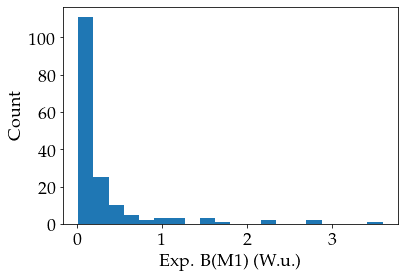

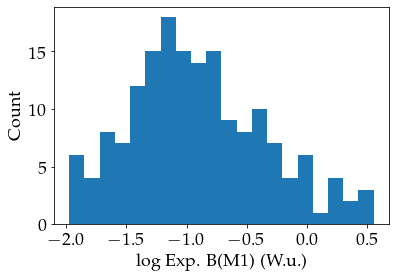

Out of 168 transitions, 155 are smaller than the Weisskopf estimate


In [8]:
y = df_usdb['B_exp (W.u.)']
plt.hist(y, bins=20, density=False)
plt.xlabel('Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()

y = np.log10(df_usdb['B_exp (W.u.)'])
plt.hist(y, bins=20, density=False)
plt.xlabel('log Exp. B(M1) (W.u.)')
plt.ylabel('Count')
plt.show()
print(f'Out of {len(y)} transitions, {len(y[y<0])} are smaller than the Weisskopf estimate')

In [9]:
df_usdb = df_usdb.rename(columns={'Unnamed: 0':'Index'})

In [10]:
df_usdb = df_usdb[df_usdb['Include']==True]

In [11]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_m1/usdb.vec',skiprows=1)

In [12]:
n_transitions = len(df_usdb)
n_params = 66
print('# transitions =', n_transitions)

# transitions = 143


In [13]:
df_usdb.keys()

Index(['Index', 'A', 'Element', 'Z', 'N', 'Energy (keV)', 'Energy Unc (keV)',
       'Ji', 'Thalf', 'E_gamma (keV)', 'E_gamma Unc (keV)', 'I_gamma',
       'I_gamma Unc', 'Mult', 'B_exp (W.u.)', 'B_exp Unc (W.u.)', 'twoJi',
       'Thalf Value', 'Thalf Units', 'Thalf Unc', 'Thalf (sec)',
       'Thalf Unc (sec)', 'B_exp (mu_N^2)', 'B_exp Unc (mu_N^2)', 'Nucleus',
       'Jf', 'twoJf', 'ni', 'nf', 'Include', 'Mth_sp', 'Mth_sn', 'Mth_lp',
       'Mth_ln'],
      dtype='object')

In [27]:
# plot error distribution with free nucleon couplings
B_exp = np.array(df_usdb['B_exp (W.u.)'])
B_exp_unc = np.array(df_usdb['B_exp Unc (W.u.)'])
M_sp = np.array(df_usdb['Mth_sp']) * np.sqrt(df_usdb['twoJi'] + 1)
M_sn = np.array(df_usdb['Mth_sn']) * np.sqrt(df_usdb['twoJi'] + 1)
M_lp = np.array(df_usdb['Mth_lp']) * np.sqrt(df_usdb['twoJi'] + 1)
M_ln = np.array(df_usdb['Mth_ln']) * np.sqrt(df_usdb['twoJi'] + 1)
# M_sp = np.array(df_usdb['Mth_sp'])
# M_sn = np.array(df_usdb['Mth_sn'])
# M_lp = np.array(df_usdb['Mth_lp'])
# M_ln = np.array(df_usdb['Mth_ln'])
g_sp_free = 5.5857
g_sn_free = -3.8263
g_lp_free = 1.
g_ln_free = 0.

def B_th(g_vec):
    g_sp, g_sn, g_lp, g_ln = g_vec
    B = ( g_sp * M_sp + g_sn * M_sn + g_lp * M_lp + g_ln * M_ln )**2
    return B

def B_th_Wu(g_vec):
    g_sp, g_sn, g_lp, g_ln = g_vec
    B = ( g_sp * M_sp + g_sn * M_sn + g_lp * M_lp + g_ln * M_ln )**2
    return B_M1_Wu(B) 

def chi2(g_vec,B_th_unc):
    # in W.u.
    R2 = (B_exp - B_M1_Wu(B_th(g_vec)))**2 / (B_exp_unc**2 + B_th_unc**2)
    val = np.sum(R2)
    return val

g_vec_free = [g_sp_free, g_sn_free,g_lp_free, g_ln_free]
chi2(g_vec_free,0.5)/(n_transitions - n_params)

50.86817714318675

In [28]:
df_usdb

,Index,A,Element,Z,N,Energy (keV),Energy Unc (keV),Ji,Thalf,E_gamma (keV),E_gamma Unc (keV),I_gamma,I_gamma Unc,Mult,B_exp (W.u.),B_exp Unc (W.u.),twoJi,Thalf Value,Thalf Units,Thalf Unc,Thalf (sec),Thalf Unc (sec),B_exp (mu_N^2),B_exp Unc (mu_N^2),Nucleus,Jf,twoJf,ni,nf,Include,Mth_sp,Mth_sn,Mth_lp,Mth_ln
0,1,18,O,8,10,3920.4400,0.1400,2,18.4 FS 2,1938.0000,0.0000,87.600,0.700,M1,0.1400,0.0200,4,18.40,FS,2.00,1.840000e-14,2.000000e-15,0.250669,0.035810,18O,2,4,2,1,True,0.0000,-0.0900,0.0000,0.0900
1,2,18,O,8,10,5254.8000,0.9000,2,7.0 FS 0.3,1334.0000,0.0000,8.700,0.400,M1,0.1110,0.0080,4,7.00,FS,0.30,7.000000e-15,3.000000e-16,0.198745,0.014324,18O,2,4,3,2,True,0.0000,0.1849,0.0000,-0.1849
2,4,19,O,8,11,96.0000,0.5000,3/2,1.39 NS 0.05,96.0000,0.0000,100.000,0.000,M1,0.0880,0.0380,3,1.39,NS,0.05,1.390000e-09,5.000000e-11,0.157563,0.068039,19O,5/2,5,1,1,True,0.0000,-0.0439,0.0000,0.0439
3,6,18,F,9,9,1700.8100,0.1800,1,662 FS 19,659.0000,0.0000,70.200,1.300,M1,0.0805,0.0027,2,662.00,FS,19.00,6.620000e-13,1.900000e-14,0.144135,0.004834,18F,0,0,2,1,True,0.0268,-0.0268,0.3135,-0.3135
4,12,18,F,9,9,3839.1700,0.2200,2,13.2 FS 1.9,777.0000,0.0000,50.000,3.000,M1,1.7000,0.3000,4,13.20,FS,1.90,1.320000e-14,1.900000e-15,3.043838,0.537148,18F,2,4,3,2,True,0.1563,-0.1563,0.3789,-0.3789
5,13,18,F,9,9,4115.9000,0.2500,3,63 FS 15,1054.0000,0.0000,95.000,3.000,M1,0.2800,0.0700,6,63.00,FS,15.00,6.300000e-14,1.500000e-14,0.501338,0.125335,18F,2,4,3,2,True,-0.1040,0.1040,-0.1876,0.1876
6,14,18,F,9,9,4360.1500,0.2600,1,19 FS 7,1298.0000,0.0000,100.000,0.000,M1,0.5000,0.2000,2,19.00,FS,7.00,1.900000e-14,7.000000e-15,0.895247,0.358099,18F,2,4,4,2,True,0.1352,0.1352,-0.1352,-0.1352
7,15,18,F,9,9,5297.6000,1.5000,4,21 FS 3,646.0000,0.0000,1.300,0.300,M1,0.0190,0.0090,8,21.00,FS,3.00,2.100000e-14,3.000000e-15,0.034019,0.016114,18F,4,8,2,1,True,-0.1606,0.1606,0.0920,-0.0920
8,16,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,2047.0000,0.0000,1.500,0.300,M1,0.0780,0.0330,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.139658,0.059086,18F,3,6,4,3,True,-0.0149,0.0149,-0.0706,0.0706
9,17,18,F,9,9,6163.2000,0.9000,3,14.0 KEV 0.5,3640.0000,0.0000,5.500,0.400,M1,0.0520,0.0170,6,14.00,KEV,0.50,3.258782e-20,9.124589e-19,0.093106,0.030438,18F,2,4,4,1,True,-0.0125,0.0125,0.1954,-0.1954


(143,)


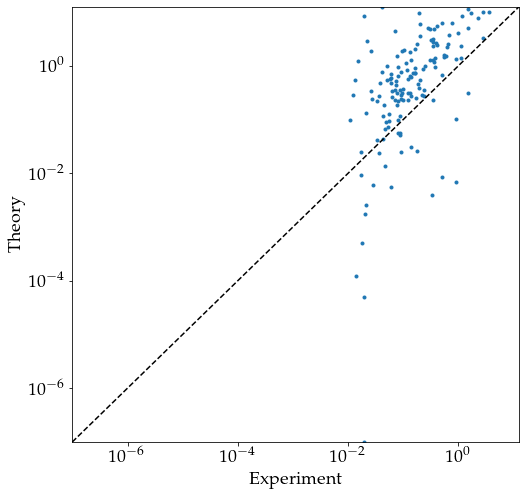

RMSE 2.6258642163770616


In [29]:
def scatter_plot(exp,th,line=True,logscale=False):
    plt.figure(figsize=(8,8))
    if logscale:
        plt.loglog(exp,th,marker='.',ls='')
    else:
        plt.scatter(exp,th,marker='.')
    if line:
        combine = np.concatenate([exp,th])
        lims = [min(combine),max(combine)] 
        plt.plot(lims,lims,c='k',ls='--')
        plt.xlim(lims)
        plt.ylim(lims)
#     plt.legend()
    plt.xlabel('Experiment')
    plt.ylabel('Theory')
    plt.show()
        
        
g_free = [5.585, -3.826, 1, 0]
g_richter = [ 5.15, -3.55, 1.159, -0.09]
B_th = B_th_Wu(g_richter)
print(B_th.shape)
scatter_plot(B_exp,B_th,logscale=True)
# scatter_plot(np.sqrt(B_exp),np.sqrt(B_th),logscale=False)

print('RMSE' , np.sqrt( np.mean( (B_exp-B_th)**2 ) ))

In [78]:
# index = 103
np.where(B_exp==0.017)

(array([ 24, 103]),)

In [80]:
for i in range(143):
    print( B_exp[i], B_th[i] )

0.14 0.0662402433519553
0.111 0.27958297557025696
0.088 0.01576035301115084
0.0805 0.17878951672572072
1.7 1.9116790144270894
0.28 0.7599767186234637
0.5 0.005882797565497201
0.019 1.125539159845564
0.078 0.02483056805095531
0.052 0.0033782158694134067
0.019 2.8964966480446958e-08
0.91 0.024823007233094954
0.06 0.002880166750413405
0.078 0.44599536689095526
0.071 0.04336279817137429
0.91 0.002753683271648045
0.05 0.11730247690332962
0.33 0.0016223599558659206
0.018 0.00014464460594413382
0.62 0.21262075423937987
0.14 0.0011506999107541898
0.014 4.948503606703904e-05
0.041 2.9765188078572566
0.019 1.444708161452513e-05
0.017 0.0002157789606759775
0.02 0.0005123612920726257
0.043 0.00707337179372067
2.3 2.1696026410800497
0.056 0.019045791356430166
0.12 0.06143095630083239
0.18 0.0046785740064860335
0.19 1.354384198215022
0.25 0.11783282568335755
0.022 0.4288836488038044
0.22 0.03799485933264804
0.35 0.2906623819267542
0.35 0.03267188148469834
0.0572 0.06143684751287152
3.59 3.4438499922

In [ ]:


def objective(x):
    return (1 -  ( chi2(g_vec_free,x)/(n_transitions - n_params) ) )**2

from scipy.optimize import minimize_scalar
opt_result = minimize_scalar(objective,)
print(opt_result.x)

In [14]:
fn_data_for_model = 'm1_data_for_model_140422.pkl'
with open(fn_data_for_model,'rb') as fh:
    data = pkl.load(fh)

In [15]:
[nuc_dict_list, Mth_sp_usdb_list, Mth_sn_usdb_list, Mth_lp_usdb_list, Mth_ln_usdb_list, Mth_sp_vec_list, Mth_sn_vec_list, Mth_lp_vec_list, Mth_ln_vec_list, title_string_list, Bexp_Wu_list, Bexp_unc_Wu_list] = data

In [16]:
len(nuc_dict_list)

143

In [17]:
len(Mth_sp_vec_list[0])

9932

In [18]:
# idx = 0
# for idx in range(40):
#     plt.figure(figsize=(10,7))
#     plt.hist(Mth_sp_vec_list[idx])
#     plt.axvline(Mth_sp_usdb_list[idx],color='k')
#     plt.title(f'transition index = {idx}')
#     plt.show()

In [25]:
A_vec = np.array([nuc_dict['A'] for nuc_dict in nuc_dict_list])
Bexp_Wu_vec = np.array(Bexp_Wu_list)
Bexp_unc_Wu_vec = np.array(Bexp_unc_Wu_list) 

Mth_sp_usdb_vec = np.array(Mth_sp_usdb_list)
Mth_sn_usdb_vec = np.array(Mth_sn_usdb_list)
Mth_lp_usdb_vec = np.array(Mth_lp_usdb_list)
Mth_ln_usdb_vec = np.array(Mth_ln_usdb_list)
Mth_sp_array = np.array(Mth_sp_vec_list)
Mth_sn_array = np.array(Mth_sn_vec_list)
Mth_lp_array = np.array(Mth_lp_vec_list)
Mth_ln_array = np.array(Mth_ln_vec_list)
n_transitions, n_samples = Mth_sp_array.shape
g_sp_free = 5.5857
g_sn_free = -3.8263
g_lp_free = 1.
g_ln_free = 0.
#g_free_list = [g_sp_free, g_sn_free, g_lp_free, g_ln_free]
g_sis_free = g_sp_free + g_sn_free
g_siv_free = g_sp_free - g_sn_free
g_lis_free = g_lp_free + g_ln_free
g_liv_free = g_lp_free - g_ln_free

#conventions
# theta = g_sp, gsn, g_lp, g_ln
# omega = g_sis, g_siv, g_lis, g_liv

def pn2iso(theta):
    g_sis = theta[0] + theta[1]
    g_siv = theta[0] - theta[1]
    g_lis = theta[2] + theta[3]
    g_liv = theta[2] - theta[3]
    return [ g_sis, g_siv, g_lis, g_liv ]

def iso2pn(omega):
    g_sp = 0.5 * (omega[0] + omega[1])
    g_sn = 0.5 * (omega[0] - omega[1])
    g_lp = 0.5 * (omega[2] + omega[3])
    g_ln = 0.5 * (omega[2] - omega[3])
    return [ g_sp, g_sn, g_lp, g_ln ]

def Bth_model_Wu(theta,Mth_sp,Mth_sn,Mth_lp,Mth_ln):
    g_sp,g_sn,g_lp,g_ln = theta
    Bth_vec = (g_sp * Mth_sp + g_sn * Mth_sn + g_lp * Mth_lp + g_ln * Mth_ln)**2
    return B_M1_Wu(Bth_vec)

def chi_squared(theta,sigmaB_apriori):
    sqr_errors = (Bexp_Wu_vec - Bth_model_Wu(theta, Mth_sp_usdb_vec, Mth_sn_usdb_vec, Mth_lp_usdb_vec, Mth_ln_usdb_vec) )**2
    B_unc_sqr_vec = np.array( [(sigmaB_apriori**2 + sigmaB**2) for sigmaB in Bexp_unc_Wu_vec])
    R_sqr =  sqr_errors / B_unc_sqr_vec
    return  np.sum(R_sqr)

def objective(sigmaB_apriori):
    theta_0 = (g_sp_free, g_sn_free, g_lp_free, g_ln_free)
    X2 = chi_squared(theta_0,sigmaB_apriori)
    dof = n_transitions - 66
    return (X2/dof - 1)**2

print('Finding a priori B-value uncertainty...')
opt_result = minimize_scalar(objective)
sigmaB_apriori = opt_result.x
print(f'A priori B(M1) uncertainty = {sigmaB_apriori}')

B_unc_sqr_vec = np.array( [sigmaB_apriori**2 + sigmaB**2 for sigmaB in Bexp_unc_Wu_vec] )

def likelihood(theta, sample):
    sqr_errors = (Bexp_Wu_vec - Bth_model_Wu(theta, Mth_sp_array[:,sample], Mth_sn_array[:,sample], Mth_lp_array[:,sample], Mth_ln_array[:,sample] ) )**2
    R_sqr_vec =  sqr_errors / B_unc_sqr_vec
    chi_sq = np.sum(R_sqr_vec)
    return  np.exp(- 0.5 * chi_sq ) 


low_bound = -20
top_bound = 20

def normal_pdf(x,m,s):
    norm = (s * np.sqrt(2*np.pi))**-1
    return norm * np.exp( - 0.5 * (x-m)**2 / s**2)

# based on Brown's table
g_sp_brown = 5.15
g_sn_brown = -3.55
g_lp_brown = 1.159
g_ln_brown = -0.09
g_brown_means = [ g_sp_brown, g_sn_brown, g_lp_brown, g_ln_brown ]

g_sis_brown = g_sp_brown + g_sn_brown
g_siv_brown = g_sp_brown - g_sn_brown
g_lis_brown = g_lp_brown + g_ln_brown
g_liv_brown = g_lp_brown + g_ln_brown

# std determined by 4*std(g) for g in Brown's table
g_sp_std_brown = 1.023
g_sn_std_brown = 0.661
g_lp_std_brown = 0.295
g_ln_std_brown = 0.175
g_brown_stds = [ g_sp_std_brown, g_sn_std_brown, g_lp_std_brown, g_ln_std_brown ]

# def prior(theta):
#     if all([(t>low_bound) and (t<top_bound) for t in theta]): 
#         return np.prod([ normal_pdf(t,g_brown_means[i],g_brown_stds[i]) for i,t in enumerate(theta) ])
#     else:
#         return 0.0

def log_flat_prior(theta):
    if all([(t>low_bound) and (t<top_bound) for t in theta]): 
        return 0.
    else:
        return -np.infty
    
# def log_posterior(omega3):
#     # omega3 = [g_sis, g_siv, g_liv]
#     # CHECK THE ORDER!
#     omega = np.array([omega3[0], omega3[1], g_lis_brown, omega3[2]])
#     theta = iso2pn(omega)
#     x = prior(theta) * np.mean(np.array( [likelihood(theta,k) for k in range(n_samples)] ))
#     return np.log(x)

def log_posterior(theta):
    Bth = np.mean((theta[0]*Mth_sp_array + theta[1]*Mth_sn_array + theta[2]*Mth_lp_array + theta[3]*Mth_ln_array)**2,axis=1)
    chi_sq = np.sum(  (Bexp_Wu_vec - Bth)**2 / B_unc_sqr_vec )
    return log_flat_prior(theta) - 0.5 * chi_sq

Finding a priori B-value uncertainty...
A priori B(M1) uncertainty = 0.5153812211207364


/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in true_divide


In [26]:
omega3_brown = [g_sis_brown, g_siv_brown, g_liv_brown]
print(omega3_brown)

[1.6000000000000005, 8.7, 1.069]


(143,)


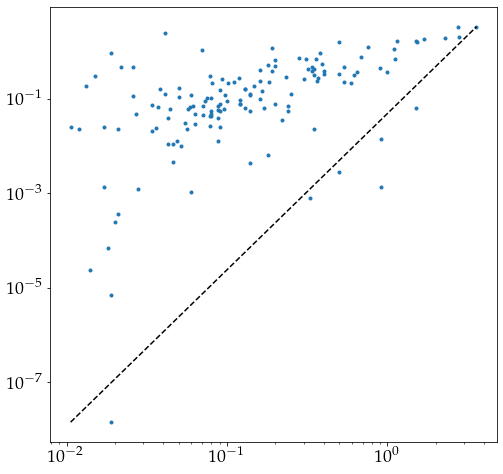

In [27]:
from scipy.optimize import minimize

In [28]:
# def obj(omega3):
# #     return -1*np.exp(log_posterior(omega3))
#     return -1*log_posterior(omega3)

def obj(theta):
    return -1*log_posterior(theta)


method = ['Nelder-Mead',
          'Powell',
          'COBYLA']
# opt_result = minimize(obj,x0=np.array([1,1,1]),method=method[2],bounds=[(-20,20), (-20,20), (-20,20)])
opt_result = minimize(obj,x0=np.array(g_brown_means),method=method[2])


In [29]:
opt_result

     fun: 17.13322676796476
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 177
  status: 1
 success: True
       x: array([ 3.95014524, -0.33783073,  1.74286263,  0.48689074])

In [25]:
omega_star = opt_result.x
theta_star = iso2pn([omega_star[0],omega_star[1],g_lis_brown,omega_star[2]])

In [26]:
theta_star

[4.375620385253609,
 -2.41324746281658,
 1.2339779658478496,
 -0.16497796584784974]

In [30]:
import emcee
from multiprocessing import Pool
from time import time

In [31]:
n_walkers = 32
n_steps = 1000
n_params = 4
use_pool = True

def starting_point():
    g_sp = np.random.uniform(low_bound,top_bound)
    g_sn =  np.random.uniform(low_bound,top_bound)
    g_lp =  np.random.uniform(low_bound,top_bound)
    g_ln =  np.random.uniform(low_bound,top_bound)
    return [g_sp,g_sn,g_lp,g_ln]

q0 = [starting_point() for _ in range(n_walkers)]

#breakpoint()

print('Beginning MCMC...')
print(f'N walkers: {n_walkers}')
print(f'N steps: {n_steps}')

version = 'test_all4'
ckpt_filename = f'checkpoint_v{version}.h5'
backend = emcee.backends.HDFBackend(ckpt_filename)
backend.reset(n_walkers, n_params)

if use_pool:
    with Pool() as pool:
        sampler = emcee.EnsembleSampler(n_walkers, n_params, log_posterior, pool=pool, backend=backend)
        start = time()
        sampler.run_mcmc(q0, n_steps, progress=True,);
        end = time()
        multi_time = end - start
        print("Multiprocessing took {0:.1f} seconds".format(multi_time))
else:
    sampler = emcee.EnsembleSampler(n_walkers, n_params, log_posterior)
    t1 = time()
    sampler.run_mcmc(q0, n_steps, progress=True,);
    t2 = time()
    print("Processing took {0:.1f} seconds".format(t2-t1))

#mu_trace = sampler.chain[:, :, 0].flatten()
#beta_trace = sampler.chain[:, :, 1].flatten()

with open(f'traces_v{version}.pkl','wb') as fh:
    pkl.dump(sampler.chain,fh)

Beginning MCMC...
N walkers: 32
N steps: 1000


100%|██████████| 1000/1000 [02:45<00:00,  6.04it/s]


Multiprocessing took 165.8 seconds


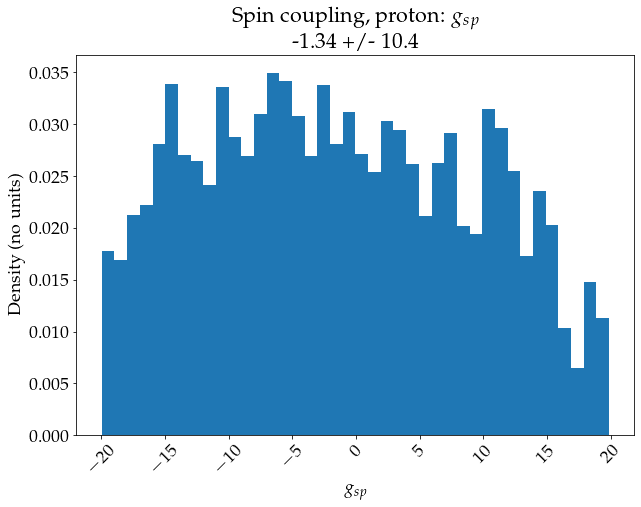

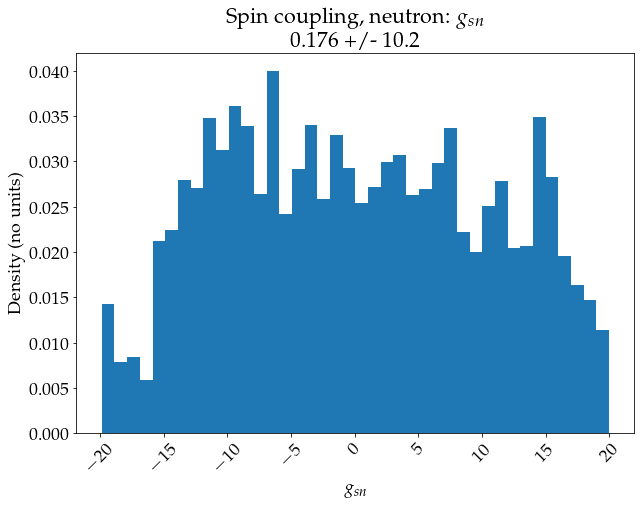

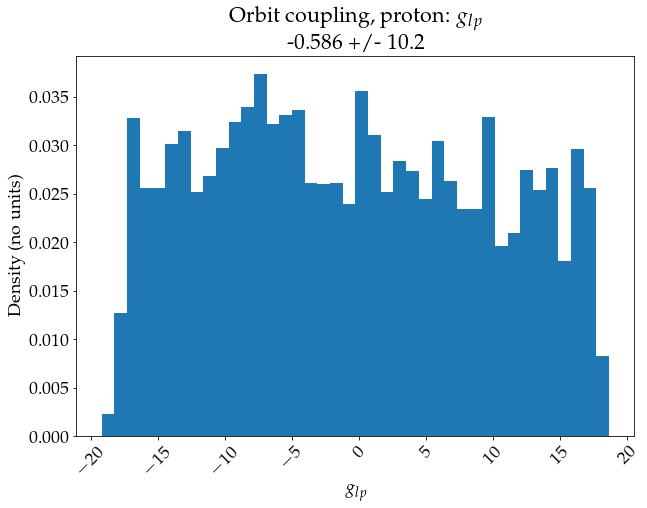

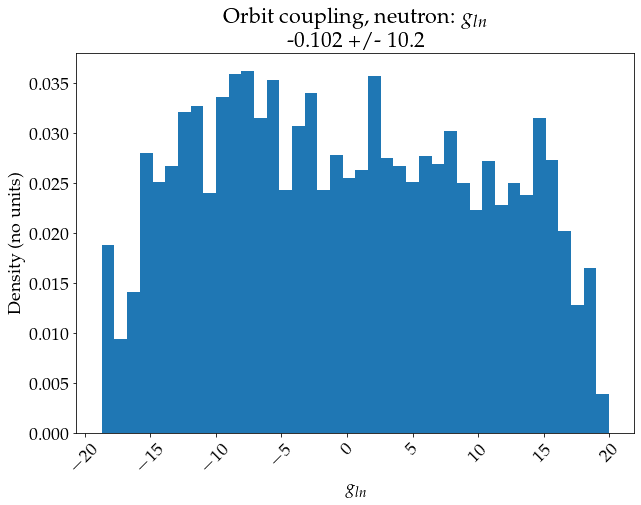

In [35]:

chain_cleaned = chain
warmup = 400

g_sp_trace = chain_cleaned[:,warmup:,0].flatten()
g_sn_trace = chain_cleaned[:,warmup:,1].flatten()
g_lp_trace = chain_cleaned[:,warmup:,2].flatten()
g_ln_trace = chain_cleaned[:,warmup:,3].flatten()

# g_sp_trace = chain[:,warmup:,0].flatten()
# g_sn_trace = chain[:,warmup:,1].flatten()
# g_lp_trace = chain[:,warmup:,2].flatten()
# g_ln_trace = chain[:,warmup:,3].flatten()


def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

make_hist(g_sp_trace,r'Spin coupling, proton: $g_{sp}$',r'$g_{sp}$')
make_hist(g_sn_trace,r'Spin coupling, neutron: $g_{sn}$',r'$g_{sn}$')
make_hist(g_lp_trace,r'Orbit coupling, proton: $g_{lp}$',r'$g_{lp}$')
make_hist(g_ln_trace,r'Orbit coupling, neutron: $g_{ln}$',r'$g_{ln}$')

